In [55]:
import pandas as pd

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [56]:
train.shape

(891, 12)

In [57]:
test.shape

(418, 11)

#### 각 dataset의 크기(행의 개수)

In [58]:
ntrain = train.shape[0]
ntest = test.shape[0]
print(ntrain, ntest)

891 418


#### dataset 하나로 합치기

In [59]:
df = pd.concat([train, test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Feature Engineering 1
- 범주형 데이터 수치형 데이터로 변환

#### Sex(성별) 숫자 변환

In [60]:
df["Sex"].isnull().sum()

np.int64(0)

In [61]:
df["Sex"].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [62]:
df["Sex"] = df["Sex"].map({"male":0, "female": 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


#### Embarked(탑승지) 숫자 변환

##### 결측치 확인
- 결측치 2개 존재

In [63]:
df["Embarked"].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [64]:
df["Embarked"].isnull().sum()

np.int64(2)

In [65]:
df.loc[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


##### 결측지 주변값 확인
- 모두 S인 것을 알 수 있음
- 따라서 해당 결측치도 S로 간주하는 것이 합리적

In [66]:
df.sort_values(["Ticket"], ascending=True)[55:80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",0,65.00,0,1,113509,61.9792,B30,C
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",0,NaN,0,0,113510,35.0000,C128,S
252,253,0.0,1,"Stead, Mr. William Thomas",0,62.00,0,0,113514,26.5500,C87,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.00,0,0,113572,80.0000,B28,NaN
61,62,1.0,1,"Icard, Miss. Amelie",1,38.00,0,0,113572,80.0000,B28,NaN
802,803,1.0,1,"Carter, Master. William Thornton II",0,11.00,1,2,113760,120.0000,B96 B98,S
390,391,1.0,1,"Carter, Mr. William Ernest",0,36.00,1,2,113760,120.0000,B96 B98,S
435,436,1.0,1,"Carter, Miss. Lucile Polk",1,14.00,1,2,113760,120.0000,B96 B98,S
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.00,1,2,113760,120.0000,B96 B98,S
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",0,NaN,0,0,113767,50.0000,A32,S


##### 결측치 처리

In [67]:
df.loc[df["Embarked"].isnull(), "Embarked"] = "S"

In [68]:
df["Embarked"].isnull().sum()

np.int64(0)

#### Embarked 데이터 숫자 변환

In [69]:
df_tmp = df.copy()

In [70]:
df_tmp["Embarked"] = df_tmp["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [71]:
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [72]:
df_tmp2 = df.copy()
df_tmp2["Embarked"] = pd.factorize(df_tmp2["Embarked"])[0]
df_tmp2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0


In [73]:
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


#### Name
- Mr, Mrs과 같이 성별 및 신분을 나타내는 문자열 추출 

In [74]:
df['Initial'] = df["Name"].str.extract(r"([A-Za-z]+)\.")

In [75]:
df["Initial"].value_counts()

Initial
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

#### 귀족 여성을 나타내는 많은 값이 존재 → 도메인 지식의 중요성(해당 initial에 대해 사전 지식을 가지고 있으면 feature Engineering에 수월)
- **해당 명칭을 Lady로 통일**
- Ms : 귀족 미망인
- Mlle, Mme: 마드모아젤 또는 마담의 줄임말, 귀족 여성을 나타냄
- Countess: 백작 부인
- Lady: 귀족 여인

In [76]:
cond = (df["Initial"] == "Mme") | (df["Initial"] == "Mlle") | (df["Initial"] == "Ms") | (df["Initial"] == "Countess") |  (df["Initial"] == "Lady")
df.loc[cond, "Initial"] = "Lady"

In [77]:
df["Initial"].value_counts()

Initial
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Lady          7
Col           4
Major         2
Don           1
Sir           1
Capt          1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [78]:
mapping = {"Mr":0, "Miss": 1, "Mrs": 2, "Master": 3, "Lady": 4, "Don": 5, "Rev": 6, "Dr": 7, "Major": 8, "Sir": 9, "Col": 10, "Capt": 11, "Jonkheer": 12}
df["Initial"] = df["Initial"].map(mapping)


In [79]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0,0.0


In [80]:
df.drop(["Name"], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0


#### Age

#### 결측치가 상당히 많은 것을 확인 가능

In [82]:
df["Age"].isnull().sum()

np.int64(263)

#### initial에 따른 평균 나이대 확인해보기
- master의 나이대가 상당히 어린 것을 알 수 있음
- initial 별로 나이를 구하여 결측치에 집어넣음

In [84]:
df.groupby("Initial").agg({'Age': ["mean", "median", "count"]})

Age             
              mean median count
Initial                        
0.0      32.252151   29.0   581
1.0      21.774238   22.0   210
2.0      36.994118   35.5   170
3.0       5.482642    4.0    53
4.0      30.166667   26.0     6
5.0      40.000000   40.0     1
6.0      41.250000   41.5     8
7.0      43.571429   49.0     7
8.0      48.500000   48.5     2
9.0      49.000000   49.0     1
10.0     54.000000   54.5     4
11.0     70.000000   70.0     1
12.0     38.000000   38.0     1

In [88]:
df["Age"].fillna(df.groupby("Initial")["Age"].transform("median"), inplace=True)

C:\Users\rladm\AppData\Local\Temp\ipykernel_3104\2495128880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df.groupby("Initial")["Age"].transform("median"), inplace=True)


In [89]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0


In [91]:
df["Age"].isnull().sum()

np.int64(0)

#### 그래프로 확인
- 20세 이하일 경우 생존률이 높음
- 중간층의 사망률이 높음

In [ ]:
import plotly.express as px

train = df[:ntrain]
fig = px.violin(train, y="Age", color="Survived", violinmode="overlay")
fig.show()

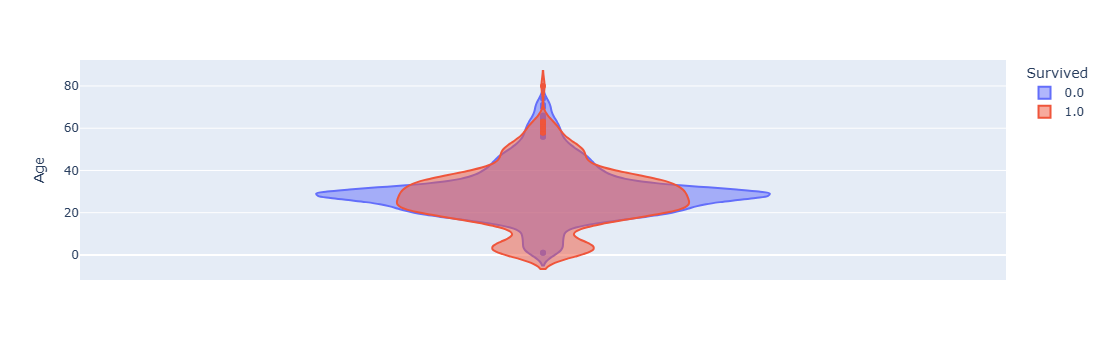